In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
INPUT_FILE = 'BedrockP.gpkg'
bedrock_data = gpd.read_file(INPUT_FILE)
bedrock_data

,gid,upid,area_m2,strat_unit,era,period,strat_age,strat_name,gp_suite,fm_lithodm,...,terrane,basin,basin_age,project,src_url,src_ref_s,map_comp,edit_date,pub_org,geometry
0,33649.0,9c192ffb,4368828.0,uKPCvl,Mesozoic,Cretaceous,Upper Cretaceous,Powell Creek Formation - upper unit,NaN,Powell Creek Formation,...,Overlap,NaN,NaN,Chilcotin-Bonaparte,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Schiarizza et al., 1997, Chilcotin-Bonaparte, ...","Schiarizza, 2017, Chicotin-Bonaparte",2018-04-05,British Columbia Geological Survey,"POLYGON ((466212.803 5669781.240, 466385.735 5..."
1,26344.0,824df15e,34431394.0,lKGsv,Mesozoic,Cretaceous,Lower Cretaceous,Gambier Group,Gambier Group,NaN,...,Overlap,NaN,NaN,Mid-coast,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Bellefontaine et al., 1994, Mid-coast, BCGS, O...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((541326.012 5529535.059, 541118.840 5..."
2,29100.0,2f4fa4a6,74490974.0,lKGsv,Mesozoic,Cretaceous,Lower Cretaceous,Gambier Group,Gambier Group,NaN,...,Overlap,NaN,NaN,Mid-coast,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Bellefontaine et al., 1994, Mid-coast, BCGS, O...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((541118.840 5528958.183, 541326.012 5..."
3,18121.0,8c3e4237,28858519.0,JKCsf,Mesozoic,Jurassic to Cretaceous,Jurassic to Cretaceous,Cayoosh assemblage?,Cayoosh assemblage?,NaN,...,Bridge River,NaN,NaN,Okanagan,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Schiarizza and Church., 1996, Okanagan, BCGS, ...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((508143.471 5601807.482, 508301.595 5..."
4,18113.0,d7681ec3,38898103.0,Mivb,Cenozoic,Neogene,Miocene,NaN,NaN,NaN,...,Younger Volcanics,NaN,NaN,Okanagan,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Schiarizza and Church., 1996, Okanagan, BCGS, ...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((508835.893 5603890.448, 508674.020 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,26392.0,28901258,14445054.0,MKgd,Mesozoic,Cretaceous,mid-Cretaceous,NaN,NaN,NaN,...,Post Accretionary,NaN,NaN,Mid-coast,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Bellefontaine et al., 1994, Mid-coast, BCGS, O...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((476082.704 5549727.241, 475761.952 5..."
1592,31814.0,f69839c7,1269847.0,PiHoGvb,Cenozoic,Neogene to Quaternary,Pliocene to Holocene,Garibaldi Group,Garibaldi Group,NaN,...,Younger Volcanics,NaN,NaN,Mid-coast,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Bellefontaine et al., 1994, Mid-coast, BCGS, O...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((496613.988 5534771.006, 496315.971 5..."
1593,31784.0,2f792b86,818647.0,PiHoGvb,Cenozoic,Neogene to Quaternary,Pliocene to Holocene,Garibaldi Group,Garibaldi Group,NaN,...,Younger Volcanics,NaN,NaN,Mid-coast,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Bellefontaine et al., 1994, Mid-coast, BCGS, O...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((460878.646 5599077.963, 460582.999 5..."
1594,20705.0,4d42ae4f,471687.0,LTrJGBo,Mesozoic,Triassic to Jurassic,Late Triassic to Early Jurassic,Guichon Creek Batholith - Border Phase,Guichon Creek Batholith,NaN,...,Quesnellia,NaN,NaN,Okanagan,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Schiarizza and Church., 1996, Okanagan, BCGS, ...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((640998.944 5566736.997, 641981.448 5..."


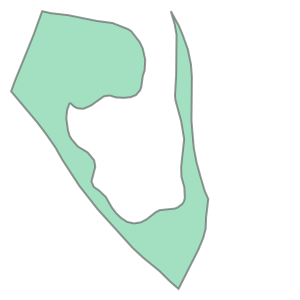

In [ ]:
bedrock_data['geometry'][2]

<Axes: >

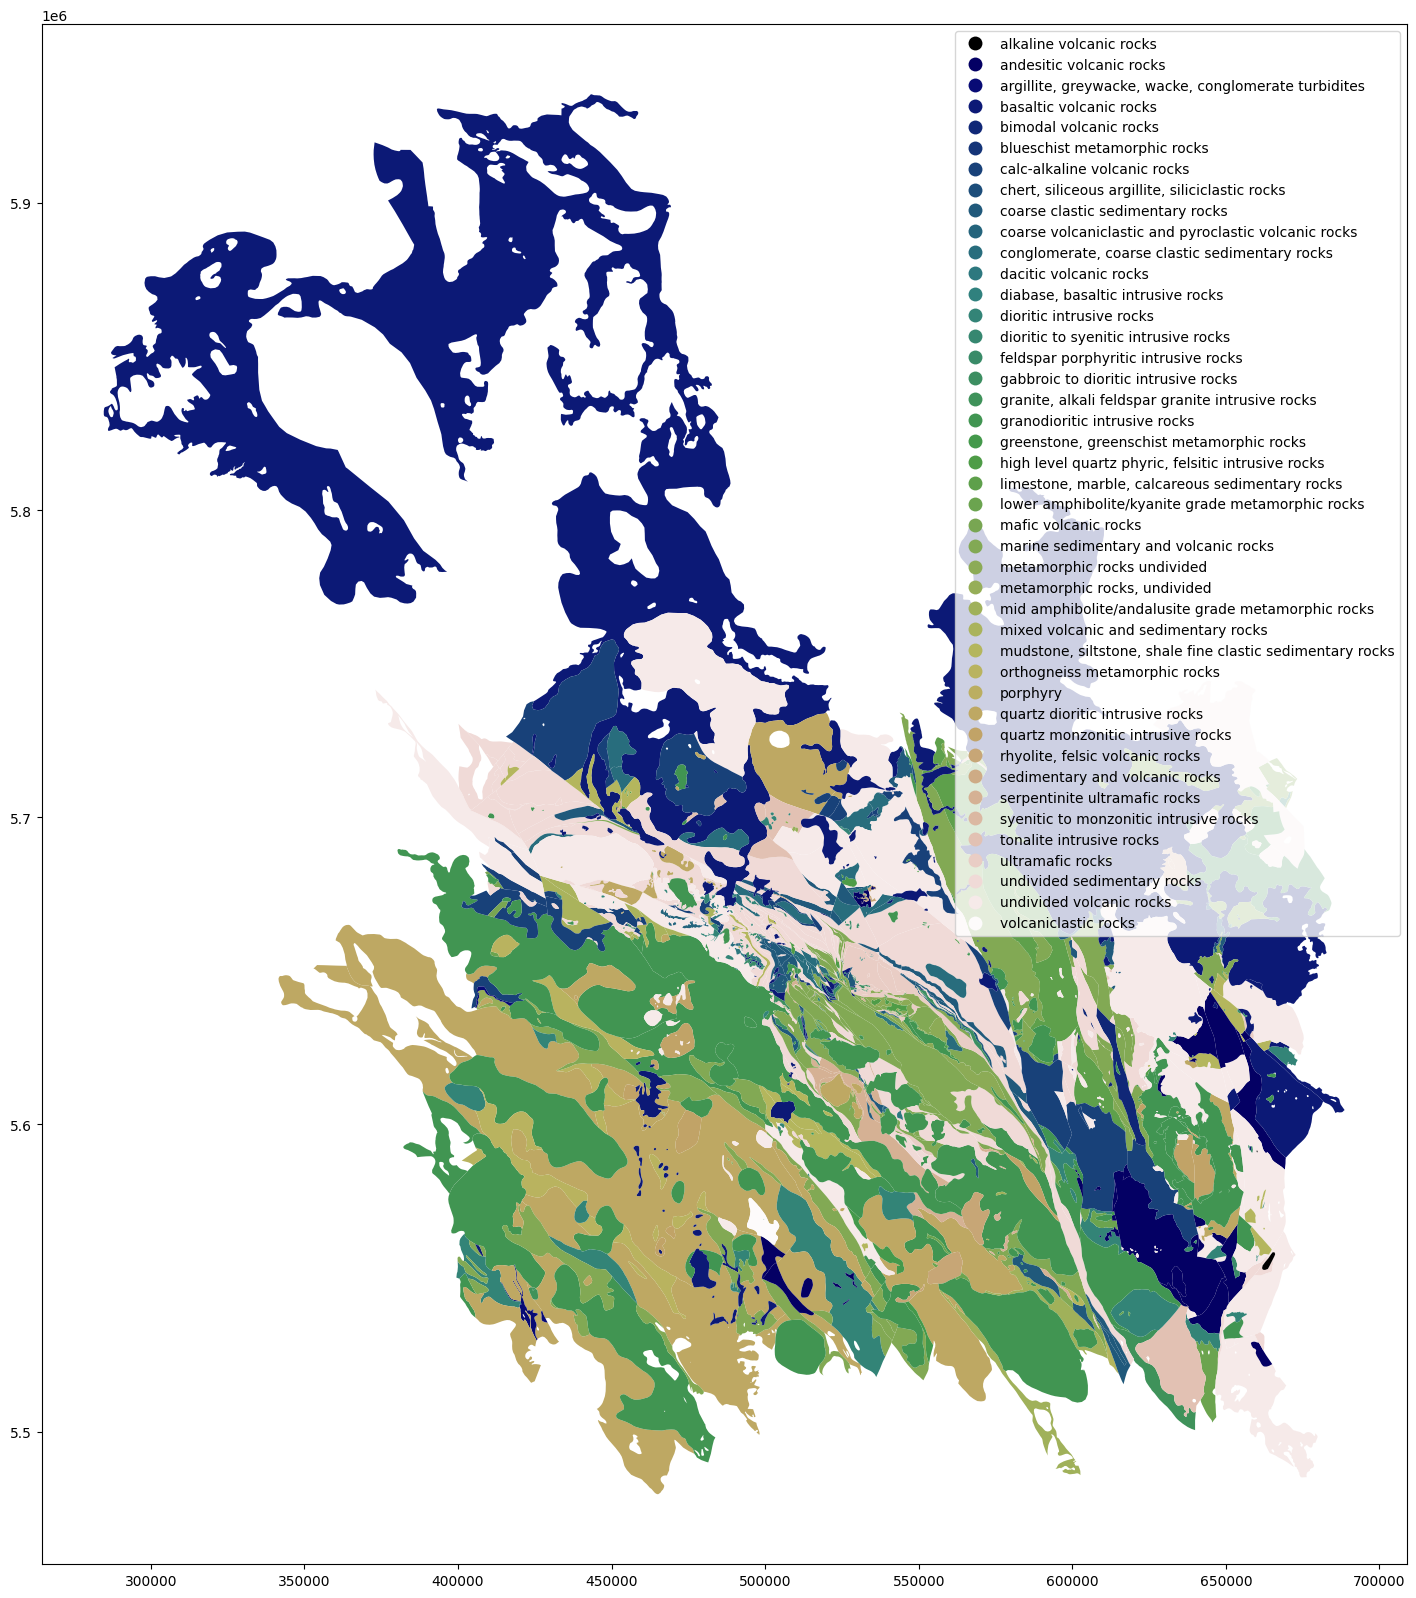

In [ ]:
bedrock_data.plot(column="rock_type", categorical=True, legend=True, figsize= (20,20), cmap='gist_earth')

In [ ]:
bedrock_data['boundary']= bedrock_data.boundary
poly1 = bedrock_data['boundary'][0]
poly2 = bedrock_data['boundary'][5]
d = poly1.boundary.distance(poly2.boundary)
print(d)

nan


In [ ]:
bedrock_data.dtypes.values

array([dtype('float64'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'),
      dtype=object)

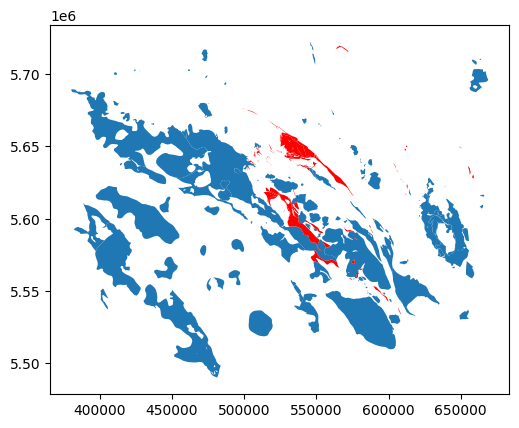

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

rock1 = bedrock_data[bedrock_data['rock_type'].str.contains('granodiorit')]

rock2 = bedrock_data[bedrock_data['rock_type'].str.contains('ultramafic')]

ax = rock1.plot()
rock2.plot(ax=ax, color = "red")
plt.savefig('map1.png')

In [ ]:
intersections = rock2[rock2['boundary'].intersects(rock1['boundary'])]
intersections

/usr/local/lib/python3.10/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


,gid,upid,area_m2,strat_unit,era,period,strat_age,strat_name,gp_suite,fm_lithodm,...,basin,basin_age,project,src_url,src_ref_s,map_comp,edit_date,pub_org,geometry,boundary


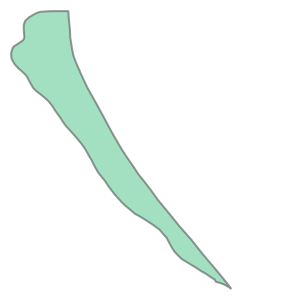

In [ ]:
rock1['geometry'][14]

In [ ]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy.spatial.distance import cdist
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


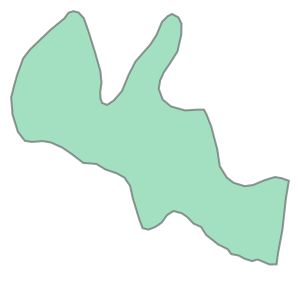

In [ ]:
bedrock_data['geometry'][0]

In [ ]:
bedrock_data.crs = "EPSG:26910"

In [ ]:
def find_shortest_path_points(poly1, poly2):
    """
    Find the coordinates of the two points, one from each polygon, that connect with a straight line
    and give the shortest distance between the two polygons.

    Parameters:
        poly1 (Polygon): First polygon.
        poly2 (Polygon): Second polygon.

    Returns:
        tuple: Tuple containing the coordinates of the two points as (point1, point2).
    """
    # Get the exterior coordinates of the polygons
    coords1 = poly1.exterior.coords[:]
    coords2 = poly2.exterior.coords[:]

    # Initialize variables for the shortest distance and corresponding points
    shortest_distance = float('inf')
    shortest_points = None

    # Iterate over all pairs of coordinates
    for point1 in coords1:
        for point2 in coords2:
            # Calculate the Euclidean distance between the two points
            distance = ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

            # Update the shortest distance and corresponding points if a shorter distance is found
            if distance < shortest_distance:
                shortest_distance = distance
                shortest_points = (point1, point2)

    return shortest_points

find_shortest_path_points(bedrock_data['geometry'][0],bedrock_data['geometry'][1])[0]

(469129.74896708207, 5667097.9782632245)

In [ ]:
#now calculate the distance between the two above points
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyproj

def calculate_distance(point1, point2):
    """
    Calculate the distance between two points given their coordinates in EPSG:26910 CRS.

    Parameters:
        point1 (tuple): Coordinates of the first point as (x, y) in EPSG:26910 CRS.
        point2 (tuple): Coordinates of the second point as (x, y) in EPSG:26910 CRS.

    Returns:
        float: Distance between the two points in meters.
    """
    # Define the EPSG codes for the CRS
    crs_epsg = 'EPSG:26910'

    # Create a pyproj transformer for the CRS
    transformer = pyproj.Transformer.from_crs(crs_epsg, crs_epsg, always_xy=True)

    # Transform the points to the CRS coordinate system
    x1, y1 = transformer.transform(point1[0], point1[1])
    x2, y2 = transformer.transform(point2[0], point2[1])

    # Calculate the distance between the transformed points
    distance = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

    return distance

calculate_distance(find_shortest_path_points(bedrock_data['geometry'][2],bedrock_data['geometry'][43])[0], find_shortest_path_points(bedrock_data['geometry'][0],bedrock_data['geometry'][1])[1])

8736.057914346042

In [ ]:
#now create a list of all distances between all polygons
import itertools

def calculate_shortest_distances(dataframe):
    """
    Calculate the shortest distances between all combinations of polygons in a GeoPandas dataframe.

    Parameters:
        dataframe (geopandas.GeoDataFrame): GeoPandas dataframe containing the polygons.

    Returns:
        dict: A dictionary with the shortest distances between polygon pairs.
              The keys are tuples representing the polygon pairs, and the values are the shortest distances.
    """
    polygon_pairs = list(itertools.combinations(dataframe['geometry'], 2))
    distances = {}

    for pair in polygon_pairs:
        points = find_shortest_path_points(pair[0], pair[1])
        distance = calculate_distance(points[0], points[1])
        distances[pair] = distance

    return distances
